In [1]:
import pandas as pd
import seaborn as sns
import gc
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split



pd.set_option('display.max_columns', None)
data_a = pd.read_csv('/Users/originfu/Desktop/ADS/screenTime/maps-synthetic-data-v1.1.csv', delimiter=",")
data_b = pd.read_csv('/Users/originfu/Desktop/ADS/screenTime/synthetic_data_dictionary.csv', delimiter=",")

In [2]:
data_a.head().append(data_a.tail())
data_a.describe()
data_a.info()

,Unnamed: 0,X,flag,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,agg_score,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,parity,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,1,1,synthetic,NaN,3.0,30,59.294132,181.602831,107.0,NaN,NaN,Any at all,Less than 1 hour,Less than 1 hour,1-2 hours,Not at all,Less than 1 hour,3 or more hours,1-2 hours,Not at all,3 or more hours,1-2 hours,3 or more hours,3 or more hours,Less than 1 hour,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,Not at all,Less than 1 hour,3 or more hours,1-2 hours,Not at all,3 or more hours,1-2 hours,3 or more hours,3 or more hours,Less than 1 hour,Yes,Yes,Yes,4,No,No,No,11.0,No,No,No,III (manual),ii,A level,A level,0.0,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~0.5%,~3%,~3%,5 or more times a week,No,NaN,NaN,NaN,NaN,NaN,No ICD-10 diagnosis of depression,0.0,0.0,0.0,NaN,0.0,Yes,Yes,often,No,"Yes, Some Days",Other,"Yes, Every Day",Female,A
1,2,2,synthetic,NaN,9.0,26,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,No,No,No,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,B
2,3,3,synthetic,NaN,3.0,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,No,No,No,III (manual),iv,O level,O level,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, Some Days","Yes, Every Day",Other,Male,A
3,4,4,synthetic,No,NaN,22,49.812426,160.224186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,III (manual),i,O level,A level,0.0,NaN,NaN,<0.1%,NaN,NaN,NaN,~0.5%,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Male,A
4,5,5,synthetic,No,8.0,31,62.270030,191.703227,132.0,Yes,NaN,Not at all,Not at all,Not at all,Less than 1 hour,Not at all,1 or more hours,1-2 hours,3 or more hours,Not at all,Less than 3 hours,3 or more hours,Less than 1 hour,Less than 3 hours,Less than 1 hour,Not at all,Not at all,Not at all,1-2 hours,Not at all,1 or more hours,1-2 hours,1-2 hours,Not at all,3 or more hours,1-2 hours,Less than 1 hour,Less than 3 hours,Less than 1 hour,NaN,NaN,No,4,No,No,No,9.0,Yes,No,No,III (manual),iv,A level,A level,1.0,<0.1%,<0.1%,<0.1%,NaN,~3%,~0.5%,~0.5%,NaN,1-4 times a week,No,Not at all,Not at all,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,often,No,"Yes, Some Days","Yes, Every Day","Yes, Every Day",Female,A
13729,13730,13730,synthetic,NaN,13.0,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,No,No,Yes,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, Every Day","Yes, Every Day","Yes, Every Day",Female,A
13730,13731,13731,synthetic,No,6.0,29,NaN,NaN,NaN,NaN,NaN,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,Any at all,Less than 1 hour,1-2 hours,3 or more hours,Less tha

,Unnamed: 0,X,mat_dep,weight_16,height_16,iq,agg_score,parity,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score
count,13734.000000,13734.000000,11145.000000,5351.000000,5364.000000,7288.000000,10714.000000,12544.000000,4513.000000,4513.000000,4513.000000,1805.000000,4513.000000
mean,6867.500000,6867.500000,5.415882,61.720509,169.286372,103.672201,9.947639,0.843033,0.417682,1.301573,0.043209,1.932410,0.437625
std,3964.808633,3964.808633,4.611888,12.003745,8.533072,16.682292,1.996768,1.009716,1.514679,3.200335,0.320880,1.327217,0.928123
min,1.000000,1.000000,0.000000,32.300000,139.512169,45.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3434.250000,3434.250000,2.000000,53.785885,163.317270,92.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6867.500000,6867.500000,4.000000,59.890308,168.875015,103.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10300.750000,10300.750000,8.000000,67.309938,175.171323,115.000000,11.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
max,13734.000000,13734.000000,28.000000,126.029499,201.519622,152.000000,15.000000,22.000000,9.000000,12.000000,4.000000,5.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13734 entries, 0 to 13733
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13734 non-null  int64  
 1   X                  13734 non-null  int64  
 2   flag               13734 non-null  object 
 3   comp_bed_9         8174 non-null   object 
 4   mat_dep            11145 non-null  float64
 5   mat_age            13326 non-null  object 
 6   weight_16          5351 non-null   float64
 7   height_16          5364 non-null   float64
 8   iq                 7288 non-null   float64
 9   comp_noint_bed_16  471 non-null    object 
 10  comp_int_bed_16    2570 non-null   object 
 11  talk_phon_wend     4850 non-null   object 
 12  text_wend          4841 non-null   object 
 13  talk_mob_wend      4834 non-null   object 
 14  comp_wend          4839 non-null   object 
 15  musi_wend          4831 non-null   object 
 16  read_wend          483

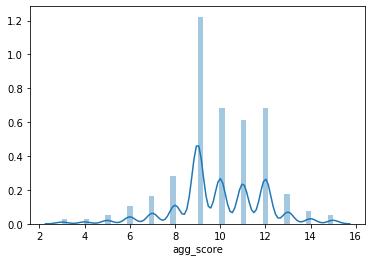

In [3]:
sns.distplot(data_a['agg_score'])


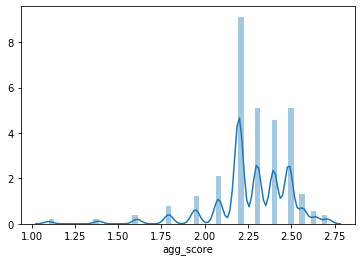

In [4]:
sns.distplot(np.log(data_a['agg_score']))

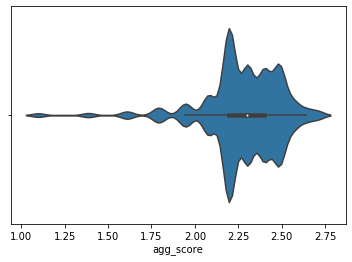

In [5]:
sns.violinplot(np.log(data_a['agg_score']))

In [6]:
num_cols = ['prim_diag', 'secd_diag', 'panic_score', 'dep_score', 'dep_thoughts']





dep_thoughts   -0.024857
prim_diag      -0.011164
panic_score    -0.003665
secd_diag      -0.002553
dep_score       0.007587
iq              1.000000
Name: iq, dtype: float64

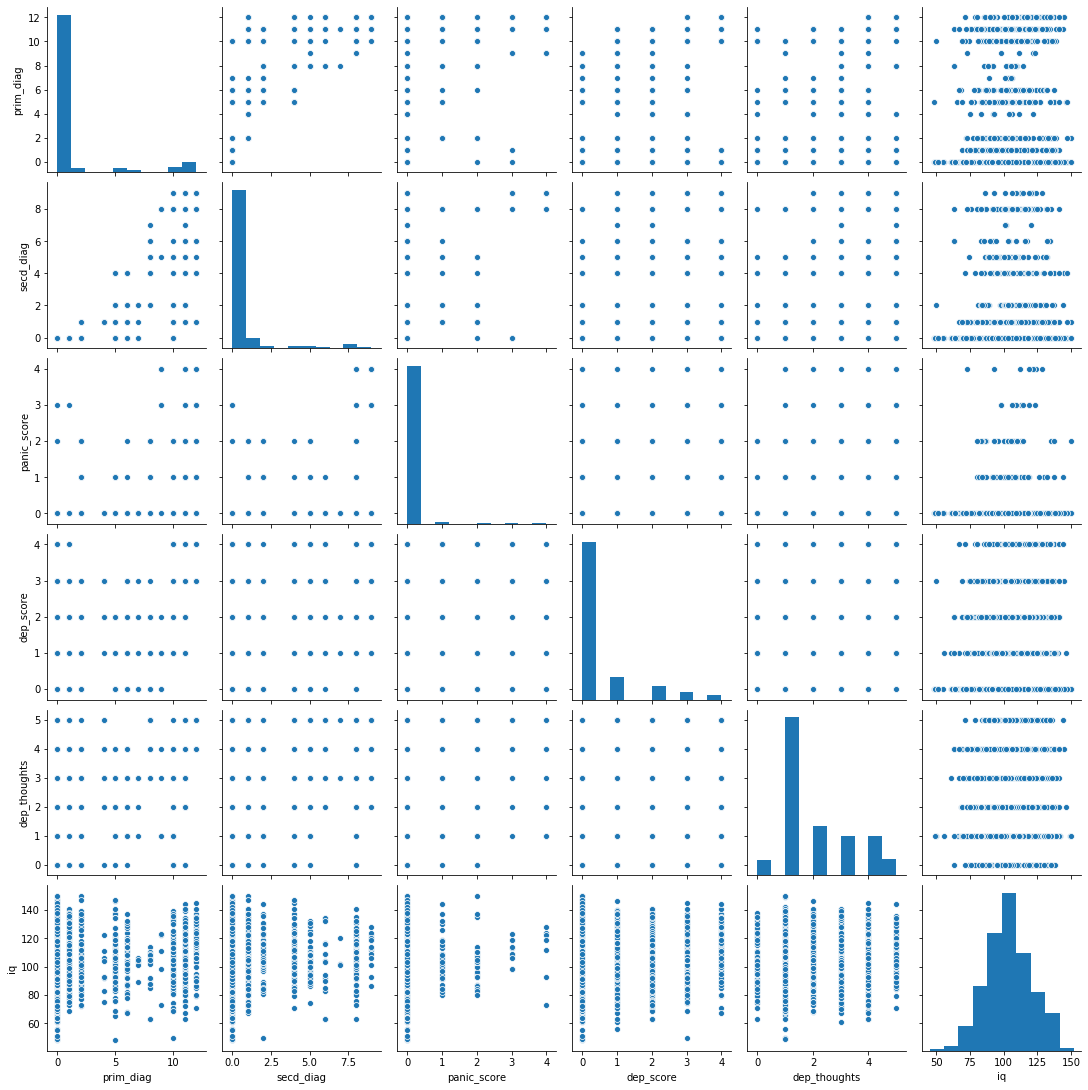

In [7]:
correlation = data_a[num_cols+['iq']].corr()
correlation['iq'].sort_values()


sns.pairplot(data_a[num_cols+['iq']])

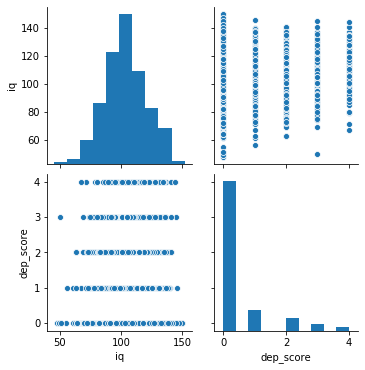

In [8]:
sns.pairplot(data_a[['iq'] + ['dep_score']])

In [9]:
data_a.corr()

,Unnamed: 0,X,mat_dep,weight_16,height_16,iq,agg_score,parity,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score
Unnamed: 0,1.000000,1.000000,0.014914,-0.013672,0.005430,0.004083,-0.000147,-0.010709,-0.001954,0.002537,-0.004982,-0.026756,-0.008412
X,1.000000,1.000000,0.014914,-0.013672,0.005430,0.004083,-0.000147,-0.010709,-0.001954,0.002537,-0.004982,-0.026756,-0.008412
mat_dep,0.014914,0.014914,1.000000,0.022857,-0.037471,-0.076213,-0.399370,0.072405,0.042720,0.049515,0.044806,0.036001,0.042168
weight_16,-0.013672,-0.013672,0.022857,1.000000,0.506162,-0.010114,-0.023589,0.023191,-0.045174,-0.032918,-0.014801,-0.044244,-0.014034
height_16,0.005430,0.005430,-0.037471,0.506162,1.000000,0.108182,-0.006108,-0.000875,-0.058494,-0.042952,-0.016259,-0.049831,-0.034491
iq,0.004083,0.004083,-0.076213,-0.010114,0.108182,1.000000,0.064654,-0.075945,-0.002553,-0.011164,-0.003665,-0.024857,0.007587
agg_score,-0.000147,-0.000147,-0.399370,-0.023589,-0.006108,0.064654,1.000000,-0.040754,-0.015039,-0.026265,-0.062852,-0.036543,-0.040472
parity,-0.010709,-0.010709,0.072405,0.023191,-0.000875,-0.075945,-0.040754,1.000000,0.045679,0.036739,0.022520,0.039167,0.036022
secd_diag,-0.001954,-0.001954,0.042720,-0.045174,-0.058494,-0.002553,-0.015039,0.045679,1.000000,0.761506,0.517815,0.544721,0.617543
prim_diag,0.002537,0.002537,0.049515,-0.032918,-0.042952,-0.011164,-0.026265,0.036739,0.761506,1.000000,0.324851,0.632179,0.725219
